# Tutorial for the Noisy Gates Qiskit provider 

This notebook aims to give a clear and quick tutorial to use and exploit a qiskit provider which use the Noisy Gates simulator to simulate the behavior to simulate the noise inside quantum device.

We assume you follow the procedure to install the library. You can find the complete documentation [here](https://quantum-gates.readthedocs.io/en/latest/index.html)



### Setup the simulation for linear topology

First of all import the necessary packages to run a simulation. Also import your IBM TOKEN if you want to simulate the behaviour of a real device, otherwise you can use the Fake device of IBM without a TOKEN.

In [2]:
import numpy as np

from quantum_gates.qiskit_provider import NoisyGatesProvider

from qiskit_ibm_runtime.fake_provider import FakeProviderForBackendV2
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit.circuit.random import random_circuit

IBM_TOKEN = ""

### Use a real device

You can choose to simulate the behavior of a real device importing the parameters and using the noise model implemented in the Noisy Gates simulator. To do this you need a IBM_TOKEN.

In [ ]:
#define the provider for the noisy gates simulator, if the token is provided than you can choose between real device, otherwise fake device

#provider = NoisyGatesProvider(token=IBM_TOKEN)
#backend = provider.get_ibm_backend('ibm_brisbane')

### Use a fake device

Otherwise you can use this provider as an alternative to the standard simulator from Qiskit and use as device the Fake Device. In this case you don't have to give a IBM_TOKEN to the Noisy Gates provider.

In [3]:
provider = NoisyGatesProvider()
backend = provider.get_ibm_backend('fake_brisbane')

# ibm fake backend
fake_provider = FakeProviderForBackendV2()
fake_backend = fake_provider.backend('fake_brisbane')

### Create the circuit

As in every simulation the first thing to do is to define the circuit to simulate through.

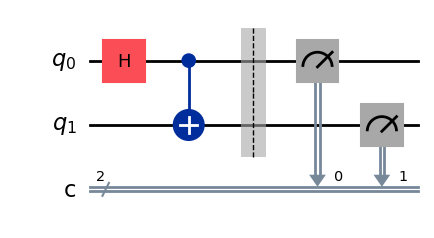

In [4]:
n_qubit = 2
n_classic_bit = 2

circ = QuantumCircuit(n_qubit,n_classic_bit)
circ.h(0)
circ.cx(0,1)
circ.barrier(range(n_qubit))
circ.measure(range(n_qubit),range(n_classic_bit))
circ.draw('mpl')

### Transpilation

After the definition of the circuit we have to transpile it in the Native Basis of the device and define the layout of the circuit. You can use the standard `transpile` from Qiskit. 

Here we provide a method from the Noisy Gates backend to transpile the circuit with the suitable option for the simulator.

In [5]:
qubits_layout = [0,1]
t_circ = backend.ng_transpile(circ=circ, init_layout=qubits_layout, seed=10)

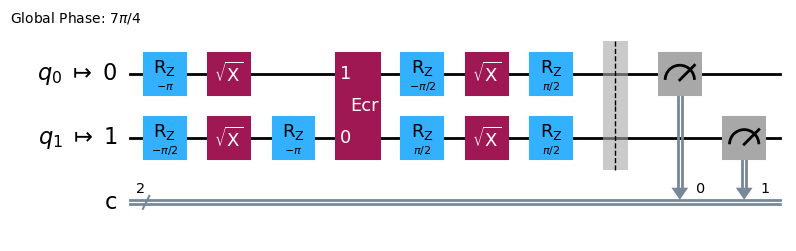

In [6]:
t_circ.draw(output='mpl', idle_wires= False)

## Noisy gates model

As in the standard backend we run the circuit taking in input the transpiled circuit and the number of shots to perform the simulation.

Then we extract from the job the result and we plot it.

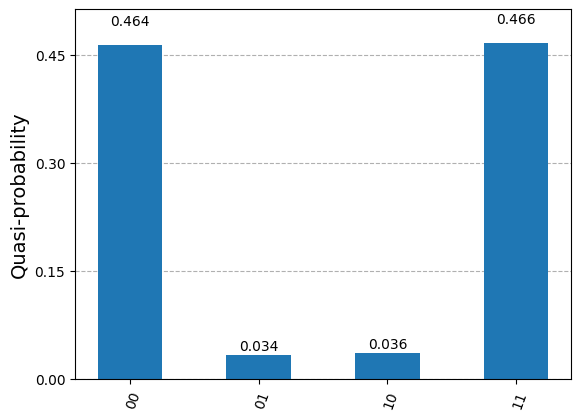

In [7]:
job = backend.run(t_circ, shots = 20)
count = job.result().get_counts()
plot_histogram(count)

## Comparison with ibm

As a proof of concept here is performed also a simulation using the IBM simulator.

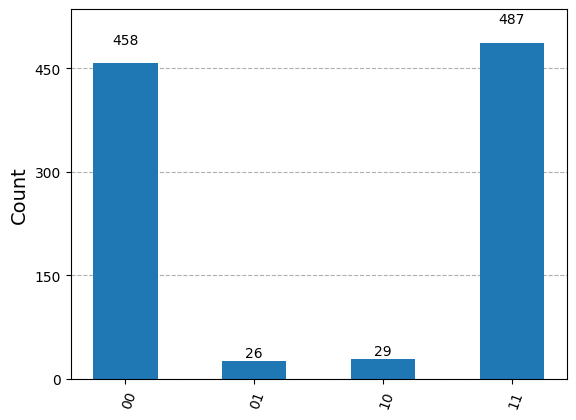

In [8]:
qubits_layout = np.arange(n_qubit)
t_circ = transpile(
    circ,
    backend,
    initial_layout=qubits_layout,
    seed_transpiler=10
)

ibm_job = fake_backend.run(t_circ, shots=1000)
ibm_count = ibm_job.result().get_counts()
plot_histogram(ibm_count)

### Your turn!

Now you can take this notebook and use it as a springboard to simulate your own quantum algorithms!

You can also decide to modify circuit class in the simulator (default is BinaryCircuit):

* `EfficientCirucit` : More efficient but it can support only linear topologies
* `BinaryCircuit` : Support non linear topologies

In [11]:
backend.set_circuit_class_ng("BinaryCircuit")

['EfficientCircuit', 'AlternativeCircuit', 'BinaryCircuit']


You can also decide to (or not to) parallelize the computation through the method `set_parallel`

In [ ]:
backend.set_parallel(paral=True)